# amazon

Use the "Run" button to execute the code.

In [27]:
!pip install jovian --upgrade --quiet

In [28]:
import jovian

In [29]:
# Execute this to save new versions of the notebook
jovian.commit(project="amazon")

<IPython.core.display.Javascript object>

[jovian] Updating notebook "karakotibhumika2000/amazon" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/karakotibhumika2000/amazon


'https://jovian.ai/karakotibhumika2000/amazon'

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import string

In [31]:
conn=sqlite3.connect('D:\Amazon\amazon\database.sqlite')

In [32]:
type(conn)

sqlite3.Connection

In [37]:
df = pd.read_csv('Reviews.csv')

In [38]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [39]:
df.shape

(568454, 10)

# we will perform sentiment analysis on data.

In [41]:
!pip install TextBlob

     |████████████████████████████████| 636 kB 5.5 MB/s eta 0:00:01
     |████████████████████████████████| 1.5 MB 12.2 MB/s eta 0:00:01
     |████████████████████████████████| 733 kB 32.3 MB/s eta 0:00:01


In [42]:
 from textblob import TextBlob

In [43]:
TextBlob(df['Summary'][0]).sentiment.polarity

0.7

In [44]:
polarity=[]

for i in df['Summary']:
    try:
        polarity.append(TextBlob(i).sentiment.polarity)
    except:
        polarity.append(0)     

In [45]:
len(polarity)

568454

In [46]:
#we copied all df to data
data=df.copy()

In [47]:
#created a new column polarity
data['Polarity']= polarity

In [48]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Polarity
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,0.7
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0.0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,0.0
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0.0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0.8


## exploratory data analysis (EDA) for the Positive sentences

In [49]:
#ALL data is transfered into data_positive
data_positive= data[data['Polarity']>0]

In [50]:
data_positive.shape

(331665, 11)

In [51]:
!pip install wordcloud

     |████████████████████████████████| 371 kB 5.8 MB/s eta 0:00:01


In [52]:
#  STOPWORD ->he,she,it,they,them
from wordcloud import WordCloud,STOPWORDS

In [53]:
#SET -> Set is used for unique values
stopwords = set(STOPWORDS)

In [54]:
data_positive.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Polarity
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,0.700000
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0.800000
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...,0.600000
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...,0.358333
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...,1.000000


In [55]:
# i need the entire data of this column
#join this summary column
total_text= (' '.join(data_positive['Summary']))

In [56]:
len(total_text)

8465012

In [57]:
total_text[0:10000]

'Good Quality Dog Food Great taffy Nice Taffy Great!  Just as good as the expensive brands! Wonderful, tasty taffy Healthy Dog Food The Best Hot Sauce in the World My cats LOVE this "diet" food better than their regular food My Cats Are Not Fans of the New Food fresh and greasy! Love it! GREAT SWEET CANDY! Always fresh Delicious product! Great Bargain for the Price The Best Hot Sauce in the World Great machine! Best of the Instant Oatmeals Good Instant Great Irish oatmeal for those in a hurry! satisfying Love Gluten Free Oatmeal!!! GOOD WAY TO START THE DAY.... Wife\'s favorite Breakfast Why wouldn\'t you buy oatmeal from Mcanns? Tastes great! Good Hot Breakfast Great taste and convenience good Very good but next time I won\'t order the Variety Pack HOT!  And good!  Came back for more  :) Roasts up a smooth brew Our guests love it! Awesome Deal! Awsome - Kids in neighborhood loved us! great deal. Better price for this at Target great source of electrolytes Great for preventing cramps T

In [58]:
# re -regular expression module ( used -> when ever we have to clean were text data or modification )
import re
total_text=re.sub('[^a-zA-Z]',' ',total_text)

In [59]:
total_text[0:20000]

'Good Quality Dog Food Great taffy Nice Taffy Great   Just as good as the expensive brands  Wonderful  tasty taffy Healthy Dog Food The Best Hot Sauce in the World My cats LOVE this  diet  food better than their regular food My Cats Are Not Fans of the New Food fresh and greasy  Love it  GREAT SWEET CANDY  Always fresh Delicious product  Great Bargain for the Price The Best Hot Sauce in the World Great machine  Best of the Instant Oatmeals Good Instant Great Irish oatmeal for those in a hurry  satisfying Love Gluten Free Oatmeal    GOOD WAY TO START THE DAY     Wife s favorite Breakfast Why wouldn t you buy oatmeal from Mcanns  Tastes great  Good Hot Breakfast Great taste and convenience good Very good but next time I won t order the Variety Pack HOT   And good   Came back for more     Roasts up a smooth brew Our guests love it  Awesome Deal  Awsome   Kids in neighborhood loved us  great deal  Better price for this at Target great source of electrolytes Great for preventing cramps Tast

In [60]:
total_text = re.sub(' +', ' ',total_text)

In [61]:
total_text[0:10000]

'Good Quality Dog Food Great taffy Nice Taffy Great Just as good as the expensive brands Wonderful tasty taffy Healthy Dog Food The Best Hot Sauce in the World My cats LOVE this diet food better than their regular food My Cats Are Not Fans of the New Food fresh and greasy Love it GREAT SWEET CANDY Always fresh Delicious product Great Bargain for the Price The Best Hot Sauce in the World Great machine Best of the Instant Oatmeals Good Instant Great Irish oatmeal for those in a hurry satisfying Love Gluten Free Oatmeal GOOD WAY TO START THE DAY Wife s favorite Breakfast Why wouldn t you buy oatmeal from Mcanns Tastes great Good Hot Breakfast Great taste and convenience good Very good but next time I won t order the Variety Pack HOT And good Came back for more Roasts up a smooth brew Our guests love it Awesome Deal Awsome Kids in neighborhood loved us great deal Better price for this at Target great source of electrolytes Great for preventing cramps Taste is not so good How much would you

(-0.5, 999.5, 499.5, -0.5)

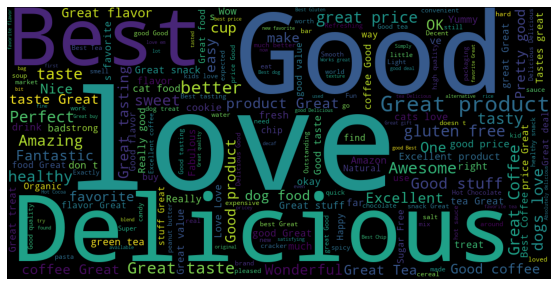

In [62]:
wordcloud=WordCloud(width=1000,height=500,stopwords=stopwords).generate(total_text)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

### performing EDA for the Negative sentences

In [63]:
data_negative = data[data['Polarity']<0]

In [64]:
total_text2= (' '.join(data_negative['Summary']))

In [65]:
total_text=re.sub('[^a-zA-Z]',' ',total_text2)

In [66]:
total_text2

'poor taste Nasty No flavor How can you go wrong! pretty expensive stale product. Bigger then other brands Order only in cold weather Bad disappointing My every day green tea BROKEN BOTTLE BOTTOMS! Tasteless but low calorie Marley\'s Mellow Mood Lite - Half Tea Half Lemonade Nearly killed the cats CHANGED FORMULA MAKES CATS SICK!!!! Not a real tea Mcclures bloody Mary mix Not Good Eukanuba puppy small breed dog food My everyday cup of Tea Disappointed Sad outcome Don\'t Waste Your Money Disappointed! sugar in the raw Good product but terrible agricultural practices Sugar in the raw Sugar in the raw too expensive Not sure So awful I can barely describe AWFUL Bitter A saving grace for Green Mountain Coffee... Fantastic Chicken Noodle soup Heinz no more! Disappointing Waste of money Ham Base MSG Ham Base Love the product disappointed in the shipping. poor item packaging Awful disappointing Hard a slight taste of jalapeno Heavy on the Vinegar These chips make me weak at the knees Not bad b

In [67]:
total_text2=re.sub(' +',' ',total_text2)

(-0.5, 999.5, 499.5, -0.5)

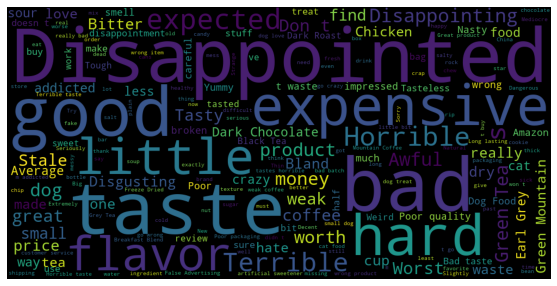

In [68]:
wordcloud2=WordCloud(width=1000,height=500,stopwords=stopwords).generate(total_text)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud2)
plt.axis('off')

## Analyse to what User Amazon Can recommend more product
#### Amazon can recommend more products to only those who are going to buy more or to one who has a better conversion rate,so lets ready data according to this problem statement

In [69]:
df['UserId'].nunique()

256059

In [70]:
raw=df.groupby(['UserId']).agg({'Summary':'count', 'Text':'count','Score':'mean','ProductId':'count'}).sort_values(by='Text',ascending=False)
raw

,Summary,Text,Score,ProductId
UserId,,,,
A3OXHLG6DIBRW8,448,448,4.535714,448
A1YUL9PCJR3JTY,421,421,4.494062,421
AY12DBB0U420B,389,389,4.647815,389
A281NPSIMI1C2R,365,365,4.841096,365
A1Z54EM24Y40LL,256,256,4.453125,256
...,...,...,...,...
A2HROKQO0GA5AF,1,1,3.000000,1
A2HROR28DMJV2W,1,1,5.000000,1
A2HRR8CO2Y20G8,1,1,5.000000,1


In [71]:
raw.columns=['Number_of_summaries','num_text','Avg_score','Number_of_products_purchased']
raw

,Number_of_summaries,num_text,Avg_score,Number_of_products_purchased
UserId,,,,
A3OXHLG6DIBRW8,448,448,4.535714,448
A1YUL9PCJR3JTY,421,421,4.494062,421
AY12DBB0U420B,389,389,4.647815,389
A281NPSIMI1C2R,365,365,4.841096,365
A1Z54EM24Y40LL,256,256,4.453125,256
...,...,...,...,...
A2HROKQO0GA5AF,1,1,3.000000,1
A2HROR28DMJV2W,1,1,5.000000,1
A2HRR8CO2Y20G8,1,1,5.000000,1


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

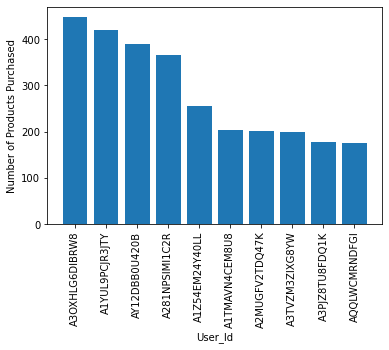

In [72]:
user_10=raw.index[0:10]
number_10=raw['Number_of_products_purchased'][0:10]
plt.bar(user_10, number_10, label='java developer')
plt.xlabel('User_Id')
plt.ylabel('Number of Products Purchased')
plt.xticks(rotation='vertical')

#### These are the Top 10 Users so we can recommend more & more Prodcuts to these Usser Id as there will be a high probability that these person are going to be buy more"

#### as data is so huge,so if your system takes a lot for the execution , u can considered some sample of data from entire data, as may be some of you have not that much good specifications in terms of processor ,RAM & HArd Disk, so according to system specifications,u can considered some sample of data,if u have not issue with your specifications,  u can go ahead with this bulky data"

In [73]:
df.sample(n=2000)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
51522,51523,B004HOLD92,AW81W6T30JG8N,J. Kappes,0,0,5,1239062400,Healthy delicious snack,"Almonds are one of the most healthy, satisfyin..."
320785,320786,B000LO40AG,A1SFO46HBCV1DZ,Wily,7,31,1,1325980800,It's all WRONG!,Forgive me if I'm stuttering while I type - I'...
368508,368509,B005K4Q1W2,AF6YV6HKCM3TA,rnkelkoo,0,0,3,1328572800,sugar free,"Did not realize this was sugar free, must have..."
39390,39391,B004XG2GGI,A3EIOMC103PG7W,Honestly,1,1,3,1322784000,too much fat,"tastes great, but too much fat like all the ot..."
218243,218244,B000UH7VRI,A214RJ0BMHRUAK,thamnosma,0,0,5,1235865600,Unexpected flavors,I really love this stuff. Not your usual past...
...,...,...,...,...,...,...,...,...,...,...
395159,395160,B008TAWJ0W,A376MA48NM23F,"dd ""dd""",0,0,2,1342051200,Strange Tea,"I bought this as a possible health tea, for cu..."
377297,377298,B004VLWASE,A10XLFE3T83WQM,NW,0,0,5,1336867200,Very good,Crackers are very good and a great alternative...
463428,463429,B005HGAUZC,A1VL1MDVD8T3BH,Flick Webb,0,0,4,1328054400,Decent Mix,What you see is what you get....not a stunning...
387224,387225,B001VIYCK4,A15ASTBZBU7AXD,"KD Allen ""me""",5,6,1,1309046400,"Science Diet = terrible for cats, it's addictive",My kitten--now a hefty 11 pound slug--went thr...


In [74]:
final=df[0:2000]

In [75]:
final.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


#### check missing values in dataset

In [76]:
final.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

#### Removing the Duplicates if any

In [78]:
final.duplicated().sum()

0

### Analyse Length of Comments whether Customers are going to give Lengthy comments or short one

In [79]:
len(final['Text'][0].split(' '))

49

In [80]:
#len of each and every comment
def calc_len(text):
    return (len(text.split(' ')))

In [81]:
final['Text_length']=final['Text'].apply(calc_len)

<ipython-input-81-a7a52d29ef9c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['Text_length']=final['Text'].apply(calc_len)


In [82]:
!pip install plotly

     |████████████████████████████████| 19.1 MB 6.1 MB/s eta 0:00:01


In [83]:
import plotly.express as px

#### Conclusion-->> Seems to have Almost 50 percent users are going to give their Feedback limited to 50 words whereas there are only few users who are going give Lengthy Feedbacks

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Score', ylabel='count'>

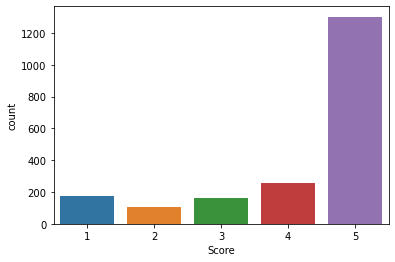

In [85]:
sns.countplot(final['Score'])

### Text Pre-Processsing

In [86]:
#convert all text to lower case for that use str.lower()
final['Text']=final['Text'].str.lower()

<ipython-input-86-8bf911bd0870>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['Text']=final['Text'].str.lower()


In [87]:
final['Text'][156]

'what a deal this is the healthiest salt you can use.  this box should last our family the year no problem.  iodized sea salt will not raise your blood pressure as regular salt will.'

In [88]:
#re has a  funcation substitute
re.sub('[^a-zA-Z]',' ',final['Text'][156])

'what a deal this is the healthiest salt you can use   this box should last our family the year no problem   iodized sea salt will not raise your blood pressure as regular salt will '

#### drawback of this re.sub in this use-case is, it will remove some numerical data too & may be that numerical values matters alot
#### thats way, I am going to create my own logic over here,that will remove all the special character

#### Logic to remove punctuations or all the special characters

In [89]:
# define punctuation\n",
punctuations = '''!()-[]{};:'\"\\,<>./?@#$%^&*_~'''

data= final['Text'][156]

# remove punctuation from the string\n",
no_punct = " "
for char in data:
     if char not in punctuations: 
            
            no_punct = no_punct + char
    
    # display the unpunctuated string
no_punct

' what a deal this is the healthiest salt you can use  this box should last our family the year no problem  iodized sea salt will not raise your blood pressure as regular salt will'

#### Create function to remove punctuations in your review

In [91]:
import jovian

In [92]:
# Execute this to save new versions of the notebook
jovian.commit(project="amazon")

<IPython.core.display.Javascript object>

[jovian] Updating notebook "karakotibhumika2000/amazon" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/karakotibhumika2000/amazon


'https://jovian.ai/karakotibhumika2000/amazon'

In [93]:
import string
punctuations =string.punctuation

def remove_punc(review):
       
       # remove punctuation from the string
        no_punct = " "
        for char in review:
            if char not in punctuations:
                no_punct = no_punct + char
        return no_punct

In [94]:
final['Text'] =final['Text'].apply(remove_punc)

<ipython-input-94-a9ecf7fe6482>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['Text'] =final['Text'].apply(remove_punc)


In [95]:
final.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Text_length
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,i have bought several of the vitality canned ...,49
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,product arrived labeled as jumbo salted peanu...,31
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",this is a confection that has been around a f...,99
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,if you are looking for the secret ingredient ...,43
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,great taffy at a great price there was a wid...,30


In [96]:
final['Text'][164]

' seriously this product was as tasteless as they come there are much better tasting products out there but at 100 calories its better than a special k bar or cookie snack pack you just have to season it or combine it with something else to share the flavor'

#### Removal of Stopwords

In [98]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [99]:
import re
from nltk.corpus import stopwords
   

In [100]:
review='seriously this product was as tasteless as they come there are much better tasting products out there but at 100 calories its better than a special k bar or cookie snack pack you just have to season it or combine it with something else to share the flavor'
   

In [101]:
re=[word for word in review.split(' ') if word not in set(stopwords.words('english'))]

str=''
for wd in re:
    str=str+wd
    str=str+' '
str


'seriously product tasteless come much better tasting products 100 calories better special k bar cookie snack pack season combine something else share flavor '

#### using join to convert list into string

In [102]:
re=[word for word in review.split(' ') if word not in set(stopwords.words('english'))]
' '.join(re)

'seriously product tasteless come much better tasting products 100 calories better special k bar cookie snack pack season combine something else share flavor'

#### perform this task using function as I have to apply this logic on my entire column
   

In [104]:
def remove_stopwords(review):
        return ' '.join([word for word in review.split(' ') if word not in set(stopwords.words('english'))])
   

In [105]:
remove_stopwords(review)

'seriously product tasteless come much better tasting products 100 calories better special k bar cookie snack pack season combine something else share flavor'

In [106]:
final.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'Text_length'],
      dtype='object')

In [107]:
final['Text'] = final['Text'].apply(remove_stopwords)

<ipython-input-107-ef18f89c205f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['Text'] = final['Text'].apply(remove_stopwords)


In [108]:
final.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Text_length
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,bought several vitality canned dog food produ...,49
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,product arrived labeled jumbo salted peanutst...,31
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",confection around centuries light pillowy ci...,99
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,looking secret ingredient robitussin believe ...,43
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,great taffy great price wide assortment yumm...,30


### Pre-process your Data in a Depth

#### check if urls is present in Text column or not

In [110]:
final['Text'].str.contains('http?').sum()

35

In [111]:
final['Text'].str.contains('http').sum()

35

In [112]:
final['Text'].str.contains('http?')

0       False
1       False
2       False
3       False
4       False
        ...  
1995    False
1996    False
1997    False
1998    False
1999    False
Name: Text, Length: 2000, dtype: bool

In [113]:
#suppose if we want to display all the rows will be using set_option
pd.set_option('display.max_rows',2000)
final['Text'].str.contains('http',regex=True)

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21       True
22      False
23      False
24      False
25       True
26      False
27      False
28      False
29      False
30      False
31      False
32      False
33      False
34      False
35      False
36      False
37      False
38      False
39       True
40      False
41      False
42      False
43      False
44      False
45      False
46      False
47      False
48      False
49      False
50      False
51      False
52      False
53      False
54      False
55      False
56      False
57      False
58      False
59      False
60      False
61      False
62      False
63      False
64      False
65      False
66      False
67      False
68      False
69      False
70      False
71    

In [114]:
final['Text'][21]

' bought husband currently overseas loves apparently staff likes alsobr generous amounts twizzlers 16ounce bag well worth price hrefhttpwwwamazoncomgpproductb001gvisjmtwizzlers strawberry 16ounce bags pack 6a'

#### we will observe we have some kind of URLs over here in my data that is definitely a kind of Dirtines in data, so we have to clean this data & make ready data for the analysis purpose
   

####  Removal of urls

In [115]:
import re

In [116]:
#in re we have a function called compiler this function is used for finding out patterns from the data
# compiler contains href and http --->after that we have dot (.) which means we have any number of characters till space --> and after that we have (w) which means word character which includes small(a to z and A to Z) and (+) indicates here more than one word character 
url_pattern = re.compile(r'href|http.\\w+') 
url_pattern.sub(r'', review)
   

'seriously this product was as tasteless as they come there are much better tasting products out there but at 100 calories its better than a special k bar or cookie snack pack you just have to season it or combine it with something else to share the flavor'

In [117]:
def remove_urls(review):
    url_pattern = re.compile(r'href|http.\\w+')
    return url_pattern.sub(r'', review)
   

In [118]:
final['Text'] = final['Text'].apply(remove_urls)

<ipython-input-118-17d456a12363>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['Text'] = final['Text'].apply(remove_urls)


In [119]:
final['Text'][34]

' instant oatmeal become soggy minute water hits bowl mccanns instant oatmeal holds texture excellent flavor good time mccanns regular oat meal excellent may take bit longer prepare time morning best instant brand ive ever eaten close second noninstant varietybr br mccanns instant irish oatmeal variety pack regular apples  cinnamon maple  brown sugar 10count boxes pack 6'

In [120]:
final.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Text_length
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,bought several vitality canned dog food produ...,49
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,product arrived labeled jumbo salted peanutst...,31
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",confection around centuries light pillowy ci...,99
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,looking secret ingredient robitussin believe ...,43
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,great taffy great price wide assortment yumm...,30


In [121]:
final['Text'].str.contains('http').sum()

35

In [122]:
final['Text'][34]

' instant oatmeal become soggy minute water hits bowl mccanns instant oatmeal holds texture excellent flavor good time mccanns regular oat meal excellent may take bit longer prepare time morning best instant brand ive ever eaten close second noninstant varietybr br mccanns instant irish oatmeal variety pack regular apples  cinnamon maple  brown sugar 10count boxes pack 6'

##### as we will see we have lots of br in my data, let me remove wherever i have br
   

In [124]:
final['Text'][34].replace('br','')

' instant oatmeal become soggy minute water hits bowl mccanns instant oatmeal holds texture excellent flavor good time mccanns regular oat meal excellent may take bit longer prepare time morning best instant and ive ever eaten close second noninstant variety  mccanns instant irish oatmeal variety pack regular apples  cinnamon maple  own sugar 10count boxes pack 6'

In [125]:
for i in range(len(final['Text'])):
    final['Text'][i]=final['Text'][i].replace('br','')
   

<ipython-input-125-cb7a0e0c008a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['Text'][i]=final['Text'][i].replace('br','')
/opt/conda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3417: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [126]:
data2=final.copy()

In [127]:
data2['Text'][34]

' instant oatmeal become soggy minute water hits bowl mccanns instant oatmeal holds texture excellent flavor good time mccanns regular oat meal excellent may take bit longer prepare time morning best instant and ive ever eaten close second noninstant variety  mccanns instant irish oatmeal variety pack regular apples  cinnamon maple  own sugar 10count boxes pack 6'

In [138]:
data2.shape

(2000, 11)

In [139]:
import jovian

In [140]:
# Execute this to save new versions of the notebook
jovian.commit(project="amazon")

<IPython.core.display.Javascript object>

[jovian] Updating notebook "karakotibhumika2000/amazon" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/karakotibhumika2000/amazon


'https://jovian.ai/karakotibhumika2000/amazon'